In [11]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

credit_card_data = pd.read_csv('creditcard.csv')
print("Dataset shape:", credit_card_data.shape)
print("\nFirst 5 rows:")
print(credit_card_data.head())
print("\nDataset info:")
print(credit_card_data.info())
print("\nMissing values:")
print(credit_card_data.isnull().sum())

Dataset shape: (284807, 31)

First 5 rows:
   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.

Legitimate transactions: 284315
Fraudulent transactions: 492

Statistical summary by class:
               Time        V1        V2        V3        V4        V5  \
Class                                                                   
0      94838.202258  0.008258 -0.006271  0.012171 -0.007860  0.005453   
1      80746.806911 -4.771948  3.623778 -7.033281  4.542029 -3.151225   

             V6        V7        V8        V9  ...       V20       V21  \
Class                                          ...                       
0      0.002419  0.009637 -0.000987  0.004467  ... -0.000644 -0.001235   
1     -1.397737 -5.568731  0.570636 -2.581123  ...  0.372319  0.713588   

            V22       V23       V24       V25       V26       V27       V28  \
Class                                                                         
0     -0.000024  0.000070  0.000182 -0.000072 -0.000089 -0.000295 -0.000131   
1      0.014049 -0.040308 -0.105130  0.041449  0.051648  0.170575  0.075667   

 

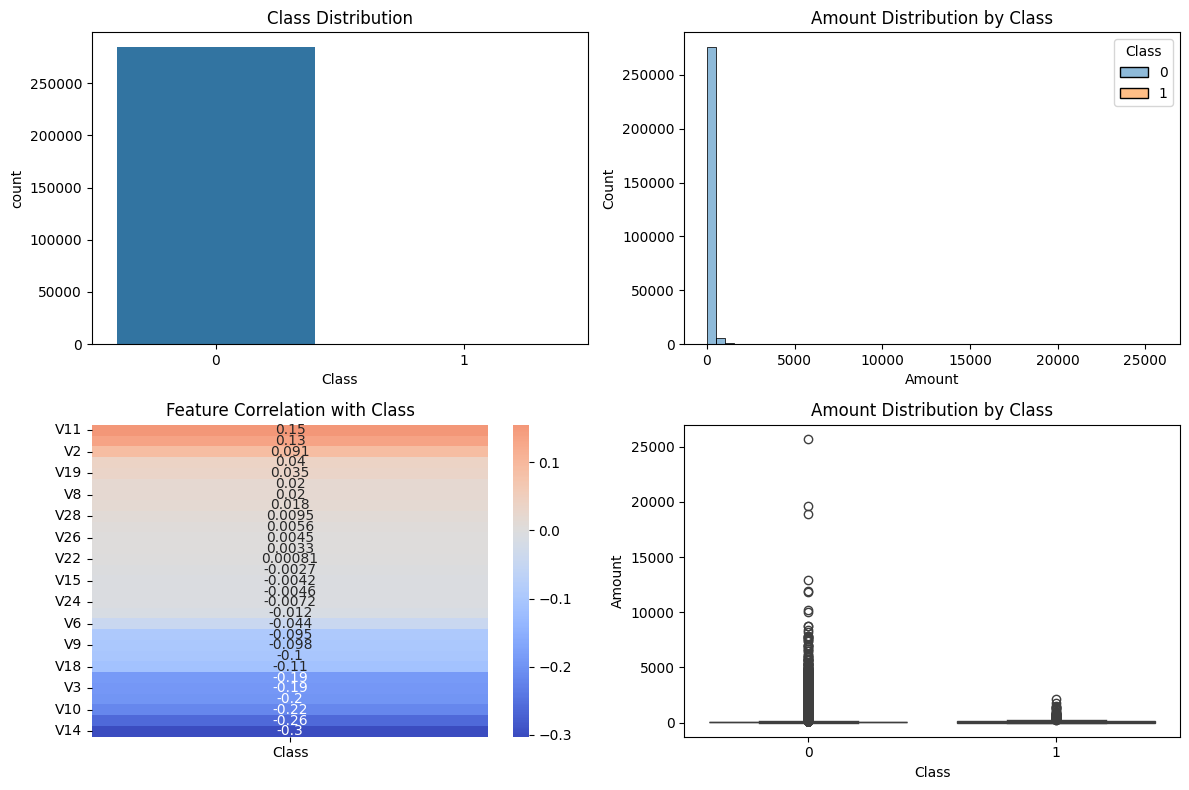

In [12]:
legit = credit_card_data[credit_card_data.Class == 0]
fraud = credit_card_data[credit_card_data.Class == 1]

print("Legitimate transactions:", legit.shape[0])
print("Fraudulent transactions:", fraud.shape[0])

print("\nStatistical summary by class:")
print(credit_card_data.groupby('Class').mean())

plt.figure(figsize=(12, 8))
plt.subplot(2, 2, 1)
sns.countplot(data=credit_card_data, x='Class')
plt.title('Class Distribution')

plt.subplot(2, 2, 2)
sns.histplot(data=credit_card_data, x='Amount', hue='Class', bins=50)
plt.title('Amount Distribution by Class')

plt.subplot(2, 2, 3)
correlation_matrix = credit_card_data.corr()
sns.heatmap(correlation_matrix['Class'].sort_values(ascending=False)[1:-1].to_frame(),
            annot=True, cmap='coolwarm', center=0)
plt.title('Feature Correlation with Class')

plt.subplot(2, 2, 4)
sns.boxplot(data=credit_card_data, x='Class', y='Amount')
plt.title('Amount Distribution by Class')

plt.tight_layout()
plt.show()

In [13]:
legit_sample = legit.sample(n=492, random_state=42)
new_dataset = pd.concat([legit_sample, fraud], axis=0)

print("New dataset shape:", new_dataset.shape)
print("Class distribution in balanced dataset:")
print(new_dataset['Class'].value_counts())

X = new_dataset.drop(columns='Class', axis=1)
Y = new_dataset['Class']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=2)
print(f"Dataset shapes - X: {X.shape}, X_train: {X_train.shape}, X_test: {X_test.shape}")
print(f"Target shapes - Y: {Y.shape}, Y_train: {Y_train.shape}, Y_test: {Y_test.shape}")

New dataset shape: (984, 31)
Class distribution in balanced dataset:
Class
0    492
1    492
Name: count, dtype: int64
Dataset shapes - X: (984, 30), X_train: (787, 30), X_test: (197, 30)
Target shapes - Y: (984,), Y_train: (787,), Y_test: (197,)


In [14]:
lr_model = LogisticRegression(solver='liblinear', max_iter=1000, random_state=42)
lr_model.fit(X_train, Y_train)

lr_train_pred = lr_model.predict(X_train)
lr_test_pred = lr_model.predict(X_test)

print("=== LOGISTIC REGRESSION RESULTS ===")
print(f"Training Accuracy: {accuracy_score(Y_train, lr_train_pred):.4f}")
print(f"Testing Accuracy: {accuracy_score(Y_test, lr_test_pred):.4f}")

=== LOGISTIC REGRESSION RESULTS ===
Training Accuracy: 0.9390
Testing Accuracy: 0.9036


In [15]:
svm_model = SVC(kernel='rbf', random_state=42)
svm_model.fit(X_train, Y_train)

svm_train_pred = svm_model.predict(X_train)
svm_test_pred = svm_model.predict(X_test)

print("=== SVM RESULTS ===")
print(f"Training Accuracy: {accuracy_score(Y_train, svm_train_pred):.4f}")
print(f"Testing Accuracy: {accuracy_score(Y_test, svm_test_pred):.4f}")

=== SVM RESULTS ===
Training Accuracy: 0.5413
Testing Accuracy: 0.5381


In [16]:
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, Y_train)

knn_train_pred = knn_model.predict(X_train)
knn_test_pred = knn_model.predict(X_test)

print("=== K-NN RESULTS ===")
print(f"Training Accuracy: {accuracy_score(Y_train, knn_train_pred):.4f}")
print(f"Testing Accuracy: {accuracy_score(Y_test, knn_test_pred):.4f}")

=== K-NN RESULTS ===
Training Accuracy: 0.7535
Testing Accuracy: 0.6701


In [17]:
def evaluate_model(model_name, y_true, y_pred):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)

    print(f"\n=== {model_name} DETAILED METRICS ===")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1-Score: {f1:.4f}")

    return accuracy, precision, recall, f1

lr_metrics = evaluate_model("LOGISTIC REGRESSION", Y_test, lr_test_pred)
svm_metrics = evaluate_model("SVM", Y_test, svm_test_pred)
knn_metrics = evaluate_model("K-NN", Y_test, knn_test_pred)

results_df = pd.DataFrame({
    'Model': ['Logistic Regression', 'SVM', 'K-NN'],
    'Accuracy': [lr_metrics[0], svm_metrics[0], knn_metrics[0]],
    'Precision': [lr_metrics[1], svm_metrics[1], knn_metrics[1]],
    'Recall': [lr_metrics[2], svm_metrics[2], knn_metrics[2]],
    'F1-Score': [lr_metrics[3], svm_metrics[3], knn_metrics[3]]
})

print("\n=== MODEL COMPARISON ===")
print(results_df)


=== LOGISTIC REGRESSION DETAILED METRICS ===
Accuracy: 0.9036
Precision: 0.9438
Recall: 0.8571
F1-Score: 0.8984

=== SVM DETAILED METRICS ===
Accuracy: 0.5381
Precision: 0.5321
Recall: 0.5918
F1-Score: 0.5604

=== K-NN DETAILED METRICS ===
Accuracy: 0.6701
Precision: 0.6737
Recall: 0.6531
F1-Score: 0.6632

=== MODEL COMPARISON ===
                 Model  Accuracy  Precision    Recall  F1-Score
0  Logistic Regression  0.903553   0.943820  0.857143  0.898396
1                  SVM  0.538071   0.532110  0.591837  0.560386
2                 K-NN  0.670051   0.673684  0.653061  0.663212


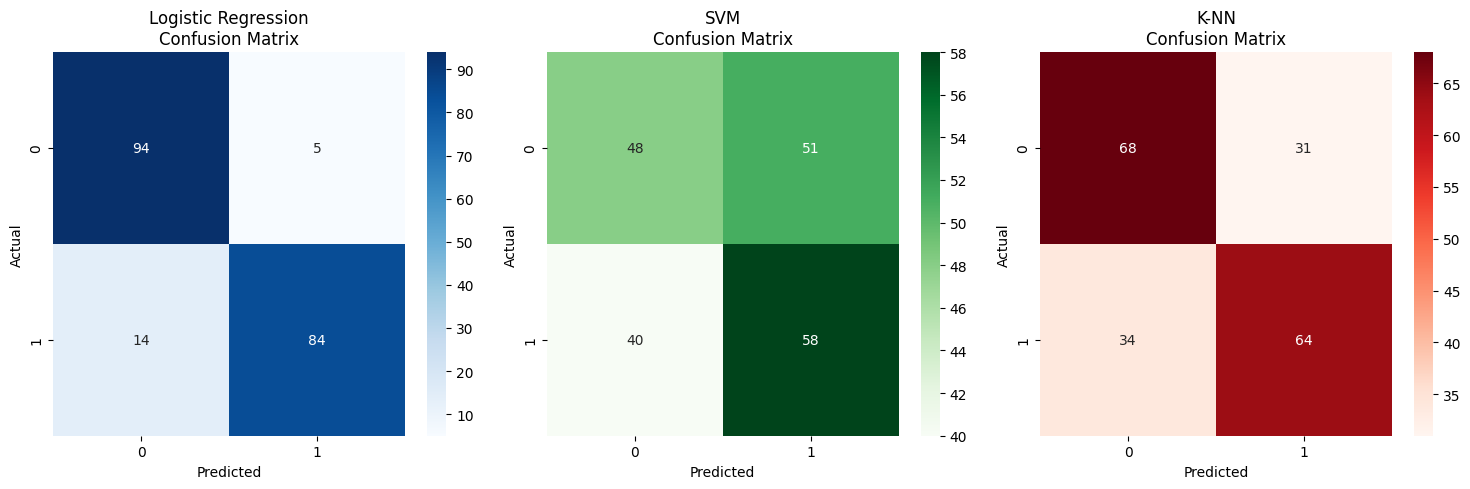

In [18]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
cm_lr = confusion_matrix(Y_test, lr_test_pred)
sns.heatmap(cm_lr, annot=True, fmt='d', cmap='Blues')
plt.title('Logistic Regression\nConfusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')

plt.subplot(1, 3, 2)
cm_svm = confusion_matrix(Y_test, svm_test_pred)
sns.heatmap(cm_svm, annot=True, fmt='d', cmap='Greens')
plt.title('SVM\nConfusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')

plt.subplot(1, 3, 3)
cm_knn = confusion_matrix(Y_test, knn_test_pred)
sns.heatmap(cm_knn, annot=True, fmt='d', cmap='Reds')
plt.title('K-NN\nConfusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')

plt.tight_layout()
plt.show()

In [19]:
print("=== LOGISTIC REGRESSION CLASSIFICATION REPORT ===")
print(classification_report(Y_test, lr_test_pred))

print("\n=== SVM CLASSIFICATION REPORT ===")
print(classification_report(Y_test, svm_test_pred))

print("\n=== K-NN CLASSIFICATION REPORT ===")
print(classification_report(Y_test, knn_test_pred))

=== LOGISTIC REGRESSION CLASSIFICATION REPORT ===
              precision    recall  f1-score   support

           0       0.87      0.95      0.91        99
           1       0.94      0.86      0.90        98

    accuracy                           0.90       197
   macro avg       0.91      0.90      0.90       197
weighted avg       0.91      0.90      0.90       197


=== SVM CLASSIFICATION REPORT ===
              precision    recall  f1-score   support

           0       0.55      0.48      0.51        99
           1       0.53      0.59      0.56        98

    accuracy                           0.54       197
   macro avg       0.54      0.54      0.54       197
weighted avg       0.54      0.54      0.54       197


=== K-NN CLASSIFICATION REPORT ===
              precision    recall  f1-score   support

           0       0.67      0.69      0.68        99
           1       0.67      0.65      0.66        98

    accuracy                           0.67       197
   macr

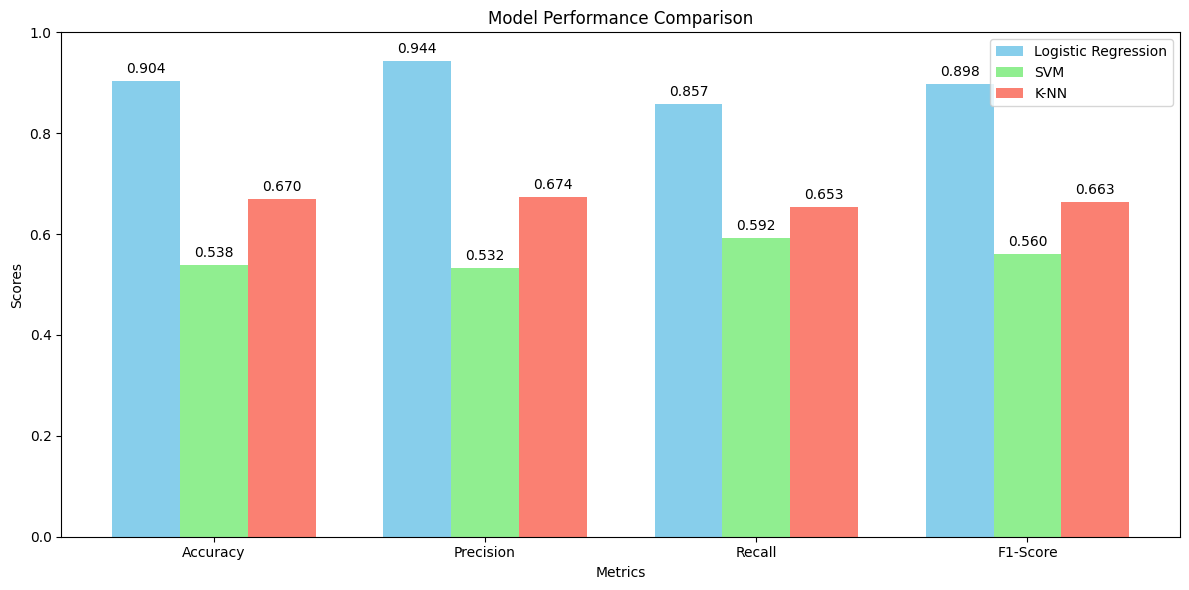

In [20]:
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
lr_scores = [lr_metrics[0], lr_metrics[1], lr_metrics[2], lr_metrics[3]]
svm_scores = [svm_metrics[0], svm_metrics[1], svm_metrics[2], svm_metrics[3]]
knn_scores = [knn_metrics[0], knn_metrics[1], knn_metrics[2], knn_metrics[3]]

x = np.arange(len(metrics))
width = 0.25

plt.figure(figsize=(12, 6))
plt.bar(x - width, lr_scores, width, label='Logistic Regression', color='skyblue')
plt.bar(x, svm_scores, width, label='SVM', color='lightgreen')
plt.bar(x + width, knn_scores, width, label='K-NN', color='salmon')

plt.xlabel('Metrics')
plt.ylabel('Scores')
plt.title('Model Performance Comparison')
plt.xticks(x, metrics)
plt.legend()
plt.ylim(0, 1)

for i, (lr, svm, knn) in enumerate(zip(lr_scores, svm_scores, knn_scores)):
    plt.text(i - width, lr + 0.01, f'{lr:.3f}', ha='center', va='bottom')
    plt.text(i, svm + 0.01, f'{svm:.3f}', ha='center', va='bottom')
    plt.text(i + width, knn + 0.01, f'{knn:.3f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()